In [423]:
#importa las librerias necesarias
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from src import soporte_limpieza as sl
from src import soporte_eda as se

In [424]:
#configura para poder visualizar todas las columnas del dataframe
pd.set_option("display.max_columns", None)

In [425]:
#lee el pickle que contiene el df final 
df = pd.read_pickle("datos/datos-final-mejorado.pkl")
df.head()

,Nome_órgão_superior,Nome_órgão,Nome_unidade_gestora,Categoria_econômica,Origem_receita,Espécie_receita,Detalhamento,Valor_previsto_atualizado,Valor_lançado,Valor_realizado,Percentual_realizado,Data_lançamento,Ano_exercício
0,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Bens, direitos e valores incorporados ao patr",Rec.divida ativa nao tributaria de outras rec,0.0,0.0,1297.13,0.0,2013-12-31,2013
1,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Indenizações, restituições e ressarcimentos",Recuperacao de despesas de exerc. anteriores,0.0,0.0,26666621.42,0.0,2013-12-31,2013
2,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Multas administrativas, contratuais e judicia",Outras multas e juros de mora,0.0,0.0,301251.13,0.0,2013-12-31,2013
3,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Bens, direitos e valores incorporados ao patr",Rec.div.ativa por infração administrativa,0.0,0.0,1855.58,0.0,2013-12-31,2013
4,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Indenizações, restituições e ressarcimentos",Outras restituicoes,0.0,0.0,52140.68,0.0,2013-12-31,2013


In [426]:
#filtra por todas las columnas, desde Nome_órgão_superior hasta Detalhamento para que devuelva un ingreso concreto que se ha observado que tiene dato tanto en el valor previsto como en el realizado
df[(df["Nome_órgão_superior"] == "Presidência da república") & (df["Nome_órgão"] == "Fundo de imprensa nacional") & (df["Nome_unidade_gestora"] == "Fundo de imprensa nacional/exec.orc.financ.") & (df["Categoria_econômica"] == "Receitas correntes - intra-orçamentárias") & (df["Origem_receita"] == "Receita industrial") & (df["Espécie_receita"] == "Receita industrial") & (df["Detalhamento"] == "Receita industrial-principal") & (df["Ano_exercício"] == 2016)]

,Nome_órgão_superior,Nome_órgão,Nome_unidade_gestora,Categoria_econômica,Origem_receita,Espécie_receita,Detalhamento,Valor_previsto_atualizado,Valor_lançado,Valor_realizado,Percentual_realizado,Data_lançamento,Ano_exercício
207607,Presidência da república,Fundo de imprensa nacional,Fundo de imprensa nacional/exec.orc.financ.,Receitas correntes - intra-orçamentárias,Receita industrial,Receita industrial,Receita industrial-principal,0.0,0.0,354407.38,0.0,2016-07-13,2016
207608,Presidência da república,Fundo de imprensa nacional,Fundo de imprensa nacional/exec.orc.financ.,Receitas correntes - intra-orçamentárias,Receita industrial,Receita industrial,Receita industrial-principal,0.0,0.0,580489.29,0.0,2016-08-08,2016
207609,Presidência da república,Fundo de imprensa nacional,Fundo de imprensa nacional/exec.orc.financ.,Receitas correntes - intra-orçamentárias,Receita industrial,Receita industrial,Receita industrial-principal,0.0,0.0,703254.81,0.0,2016-09-05,2016
207610,Presidência da república,Fundo de imprensa nacional,Fundo de imprensa nacional/exec.orc.financ.,Receitas correntes - intra-orçamentárias,Receita industrial,Receita industrial,Receita industrial-principal,0.0,0.0,147189.73,0.0,2016-03-23,2016
207611,Presidência da república,Fundo de imprensa nacional,Fundo de imprensa nacional/exec.orc.financ.,Receitas correntes - intra-orçamentárias,Receita industrial,Receita industrial,Receita industrial-principal,0.0,0.0,269745.14,0.0,2016-09-29,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207865,Presidência da república,Fundo de imprensa nacional,Fundo de imprensa nacional/exec.orc.financ.,Receitas correntes - intra-orçamentárias,Receita industrial,Receita industrial,Receita industrial-principal,0.0,0.0,1157696.18,0.0,2016-12-28,2016
207866,Presidência da república,Fundo de imprensa nacional,Fundo de imprensa nacional/exec.orc.financ.,Receitas correntes - intra-orçamentárias,Receita industrial,Receita industrial,Receita industrial-principal,0.0,0.0,388793.40,0.0,2016-10-13,2016
207867,Presidência da república,Fundo de imprensa nacional,Fundo de imprensa nacional/exec.orc.financ.,Receitas correntes - intra-orçamentárias,Receita industrial,Receita industrial,Receita industrial-principal,0.0,0.0,875686.39,0.0,2016-12-23,2016
207868,Presidência da república,Fundo de imprensa nacional,Fundo de imprensa nacional/exec.orc.financ.,Receitas correntes - intra-orçamentárias,Receita industrial,Receita industrial,Receita industrial-principal,0.0,0.0,1039808.06,0.0,2016-02-02,2016


Análisis de ingresos recaudados

Para empezar, quiero conocer el total de ingresos recaudados entre 2013 y 2021

In [427]:
#calcula el total de los ingresos para todos los años
total_ingresos = df["Valor_realizado"].sum()
total_ingresos

np.float64(25637382435446.004)

De 2013 a 2021 el gobierno de Brasil recaudó 25.637.382.435.446 BRL

Voy a observar ahora año a año como fue esta recaudación para poder detectar diferencias en la recaudación entre periodos anuales. Lo primero que voy a hacer es crear un dataframe donde voy a tener los años agrupados y para cada año voy a tener por un lado los ingresos totales recaudados en ese año, y por otro lado, el % de esos ingresos sobre el total de la recaudación para todos los años. Con % considero que se ve mejor

In [428]:
#genera el dataframe para la primera visualizacion (recaudacion de ingresos año a año)
df_ingresos_año = df.groupby("Ano_exercício")["Valor_realizado"].sum()
df_ingresos_año = df_ingresos_año.reset_index()
df_ingresos_año["%/Total"] = round((df_ingresos_año["Valor_realizado"] / total_ingresos)*100,2)
df_ingresos_año

,Ano_exercício,Valor_realizado,%/Total
0,2013,1.893614e+12,7.39
1,2014,2.238551e+12,8.73
2,2015,2.665685e+12,10.40
3,2016,2.839712e+12,11.08
4,2017,2.558047e+12,9.98
5,2018,2.942388e+12,11.48
6,2019,2.991565e+12,11.67
7,2020,3.631449e+12,14.16
8,2021,3.876372e+12,15.12


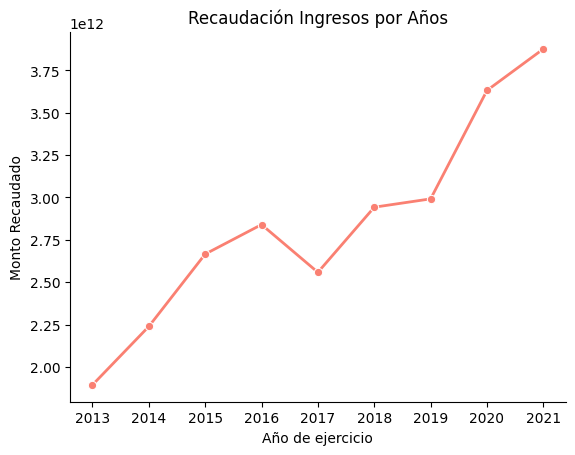

In [429]:
#genera la primera visualizacion (recaudacion ingresos año a año)
sns.lineplot(x = df_ingresos_año["Ano_exercício"],
              y = df_ingresos_año["Valor_realizado"], 
               marker = "o", 
                linewidth = 2, 
                color="salmon", 
                errorbar = None)

plt.title("Recaudación Ingresos por Años")
plt.xlabel("Año de ejercicio")
plt.ylabel("Monto Recaudado")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

Parece que la recaudación de los ingresos siguen de forma general una tendencia alcista con el paso de los años entre 2013 y 2021. De 2013 a 2016 la recaudación en los ingresos aumenta año a año. Se pasa de 1,89 billones de BRL (que suponen un 7,39% sobre la recaudación total entre 2013 y 2021) en 2013 a 2,83 billones (11,08%) en 2016. Sin embargo, en 2017, es el único año donde se observa un descenso en la recaudación, pues el % sobre la recaudación total cae a un 9,98%. A partir de este año y hasta 2021, los ingresos continúan aumentando hasta obtener en 2021 un % de 15,12% (3,87 billones). En total, con los años, el aumento en el porcentaje ha sido de un 8% aprox

Una vez observado como han evolucionado los ingresos recaudados por el gobierno de Brasil a lo largo de los años, me gustaría observarlo también a lo largo de los meses (de forma general, para todos los años). Voy a generar un dataframe igual que el de los años, pero esta vez agrupando por mes. Para ello, lo primero que necesito es disponer de una columna en mi dataframe original donde disponga de únicamente el mes, ya que en la columna de fecha de registro dispongo del día, mes, y año

In [430]:
#crea la columna de mes_registro 
df["Mes_registro"] = df["Data_lançamento"].dt.month
df.head()

,Nome_órgão_superior,Nome_órgão,Nome_unidade_gestora,Categoria_econômica,Origem_receita,Espécie_receita,Detalhamento,Valor_previsto_atualizado,Valor_lançado,Valor_realizado,Percentual_realizado,Data_lançamento,Ano_exercício,Mes_registro
0,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Bens, direitos e valores incorporados ao patr",Rec.divida ativa nao tributaria de outras rec,0.0,0.0,1297.13,0.0,2013-12-31,2013,12.0
1,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Indenizações, restituições e ressarcimentos",Recuperacao de despesas de exerc. anteriores,0.0,0.0,26666621.42,0.0,2013-12-31,2013,12.0
2,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Multas administrativas, contratuais e judicia",Outras multas e juros de mora,0.0,0.0,301251.13,0.0,2013-12-31,2013,12.0
3,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Bens, direitos e valores incorporados ao patr",Rec.div.ativa por infração administrativa,0.0,0.0,1855.58,0.0,2013-12-31,2013,12.0
4,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Indenizações, restituições e ressarcimentos",Outras restituicoes,0.0,0.0,52140.68,0.0,2013-12-31,2013,12.0


In [431]:
#genera el dataframe para la segunda visualizacion (recaudacion de ingresos mes a mes)
df_ingresos_mes = df.groupby("Mes_registro")["Valor_realizado"].mean()
df_ingresos_mes = df_ingresos_mes.reset_index()
df_ingresos_mes["%/Total"] = round((df_ingresos_mes["Valor_realizado"] / df_ingresos_mes["Valor_realizado"].sum())*100,2)
df_ingresos_mes

,Mes_registro,Valor_realizado,%/Total
0,1.0,2.073355e+07,6.86
1,2.0,1.509530e+07,5.00
2,3.0,1.849139e+07,6.12
3,4.0,1.906940e+07,6.31
4,5.0,1.484075e+07,4.91
5,6.0,1.485984e+07,4.92
6,7.0,1.930557e+07,6.39
7,8.0,1.932318e+07,6.39
8,9.0,2.277911e+07,7.54
9,10.0,2.011470e+07,6.66


In [432]:
#saca los valores unicos de la columna Mes_registro
df_ingresos_mes["Mes_registro"].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

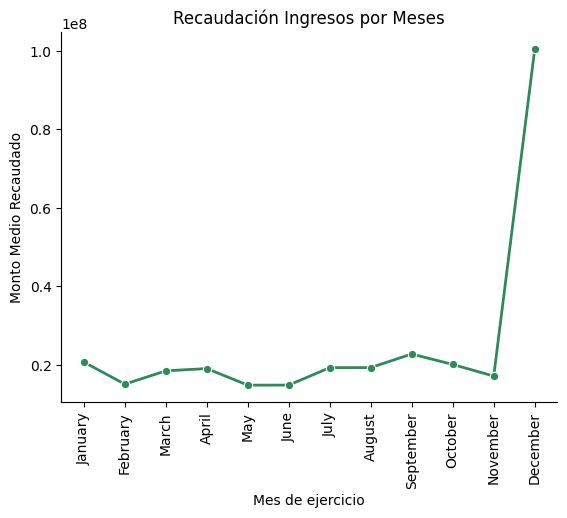

In [433]:
#genera la segunda visualizacion (recaudacion ingresos mes a mes)
sns.lineplot(x = df_ingresos_mes["Mes_registro"],
              y = df_ingresos_mes["Valor_realizado"], 
               marker = "o", 
                linewidth = 2, 
                color="seagreen", 
                errorbar = None)

plt.title("Recaudación Ingresos por Meses")
plt.xlabel("Mes de ejercicio")
plt.ylabel("Monto Medio Recaudado")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xticks(ticks=df_ingresos_mes["Mes_registro"].unique(), labels=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], rotation=90);

En este gráfico se observa algo que ya venía esperando, pues he de recordar que en el análisis exploratorio ya había observado que algo raro ocurría con la fecha de registro en los 3 primeros años, pues esta era siempre la misma (31 de diciembre). Es por ello por lo que parece de primeras que diciembre es el mes en el que más se recauda con diferencia, pero en realidad esto no es así. Voy a hacer el gráfico de nuevas omitiendo los años de 2013, 2014 y 2015, de forma que os datos ya sean más realistas

In [434]:
#crea un dataframe a partir del original con todos los años excepto el 2013, 2014 y 2015
df_sin_tres_primeros_años = df[(df["Ano_exercício"] != 2013) & (df["Ano_exercício"] != 2014) & (df["Ano_exercício"] != 2015)]
df_sin_tres_primeros_años.head()

,Nome_órgão_superior,Nome_órgão,Nome_unidade_gestora,Categoria_econômica,Origem_receita,Espécie_receita,Detalhamento,Valor_previsto_atualizado,Valor_lançado,Valor_realizado,Percentual_realizado,Data_lançamento,Ano_exercício,Mes_registro
13574,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,Demais receitas correntes,Encargos legais pela inscr.em div.ativa-princ,0.0,0.0,154948.98,0.0,2016-04-04,2016,4.0
13575,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,Demais receitas correntes,Onus de sucumbencia-multas e juros,0.0,0.0,80.84,0.0,2016-12-08,2016,12.0
13576,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,Demais receitas correntes,Outras receitas-primarias-principal,0.0,0.0,4996.11,0.0,2016-08-22,2016,8.0
13577,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,"Impostos, taxas e contribuições de melhoria",Taxas,Taxa de controle e fisc.ambiental-mul.jur.,0.0,0.0,0.77,0.0,2016-03-21,2016,3.0
13578,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,Demais receitas correntes,Onus de sucumbencia-multas e juros,0.0,0.0,23.45,0.0,2016-11-04,2016,11.0


In [435]:
#genera el dataframe para la segunda visualizacion (recaudacion de ingresos mes a mes) sin los 3 primeros años
df_ingresos_mes_correcto = df_sin_tres_primeros_años.groupby("Mes_registro")["Valor_realizado"].mean()
df_ingresos_mes_correcto = df_ingresos_mes_correcto.reset_index()
df_ingresos_mes_correcto["%/Total"] = round((df_ingresos_mes_correcto["Valor_realizado"] / df_ingresos_mes_correcto["Valor_realizado"].sum())*100,2)
df_ingresos_mes_correcto

,Mes_registro,Valor_realizado,%/Total
0,1.0,2.073355e+07,9.27
1,2.0,1.509530e+07,6.75
2,3.0,1.849139e+07,8.27
3,4.0,1.906940e+07,8.53
4,5.0,1.484075e+07,6.64
5,6.0,1.485984e+07,6.65
6,7.0,1.930557e+07,8.64
7,8.0,1.932318e+07,8.64
8,9.0,2.277911e+07,10.19
9,10.0,2.011470e+07,9.00


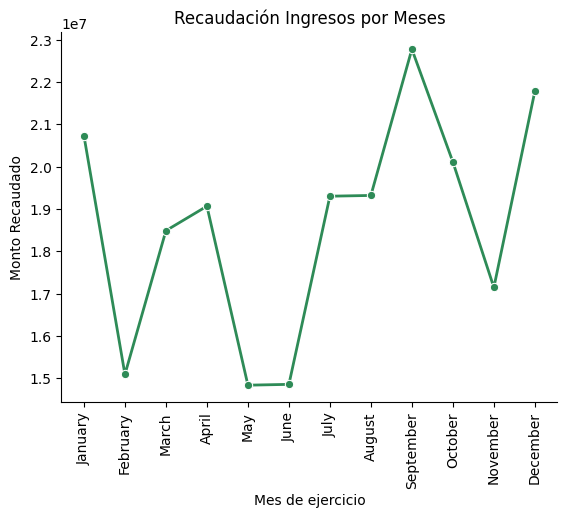

In [436]:
#genera la segunda visualizacion (recaudacion ingresos mes a mes) sin los 3 primeros años
sns.lineplot(x = df_ingresos_mes_correcto["Mes_registro"],
              y = df_ingresos_mes_correcto["Valor_realizado"], 
               marker = "o", 
                linewidth = 2, 
                color="seagreen", 
                errorbar = None)

plt.title("Recaudación Ingresos por Meses")
plt.xlabel("Mes de ejercicio")
plt.ylabel("Monto Recaudado")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xticks(ticks=df_ingresos_mes_correcto["Mes_registro"].unique(), labels=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], rotation=90);

Ahora si podemos llegar a unos resultados más realistas. En el caso de los meses, se observa bastante más fluctuación que en el caso de los años. En los meses el monto flúctua entre 15 y 23 millones BRL aprox. Parece que con el paso de los meses la recaudación no sigue una tendencia clara. Septiembre parece que es en media el mes en el que más se recauda seguido de diciembre. En septiembre se recauda en media 22,7 millones (lo que supone un 10,19% de la recaudación total media de un año). En diciembre se recauda 21,7 millones (9,74%). Por el contrario, febrero, mayo y junio parecen ser los meses de menor recaudación. En febrero se recaudan 15 millones (6,75%), en mayo 14,8 (6,64%) y en junio 14,8 (6,65%). Hay grandes fluctuaciones entre los meses y parece que la mayor está entre enero y febrero. El año comienza bastante bien en enero alcanzando una recaudación de 20,7 millones (el 9,27% de la recaudación total anual) pero en febrero la recaudación cae bastante (cae algo más de cinco millones). Sin embargo, a pesar de que las fluctuaciones entre meses sean evidentes, la recaudación entre meses no es demasiado significativa, pues el rango entre el que se mueve el monto recaudado no es demasiado amplio. Es decir, no hay un mes en el que se concentre mayoritariamente la recaudación. Está bastante distribuida

Tras este primer análisis temporal, me gustaría comprobar si lo visto en la exploración de los datos en relación con el % de racaudación en términos de frecuencia por las categorías económicas y por los órganos superiores también se cumple en términos monetarios. Voy a hacer primero un análisis de ingresos recaudados (para todos los años) por categorías económicas y luego por órganos superiores

In [437]:
#genera el dataframe para la tercera visualizacion (recaudacion de ingresos por categoria economica)
df_ingresos_categoria = df.groupby("Categoria_econômica")["Valor_realizado"].sum()
df_ingresos_categoria = df_ingresos_categoria.reset_index()
df_ingresos_categoria["%/Total"] = round((df_ingresos_categoria["Valor_realizado"] / total_ingresos)*100,2)
df_ingresos_categoria = df_ingresos_categoria.drop([4], axis=0)
df_ingresos_categoria =df_ingresos_categoria.sort_values(by="%/Total", ascending=False)
df_ingresos_categoria

,Categoria_econômica,Valor_realizado,%/Total
0,Receitas correntes,1.290934e+13,50.35
2,Receitas de capital,1.240714e+13,48.39
1,Receitas correntes - intra-orçamentárias,2.926518e+11,1.14
3,Receitas de capital - intra-orçamentárias,2.825084e+10,0.11


He ordenado las filas de este dataframe por los valores del %/Total para cuando haga la visualización que queden las gráficas colocadas de mayor a menor. Por otro lado, he eliminado la fila que contenía la categoría "Sin información" ya que tenía un % sobre el total del 0%, por lo que no aporta nada de valor en el análisis esta categoría más que tener en cuenta que no se recauda nada con ella

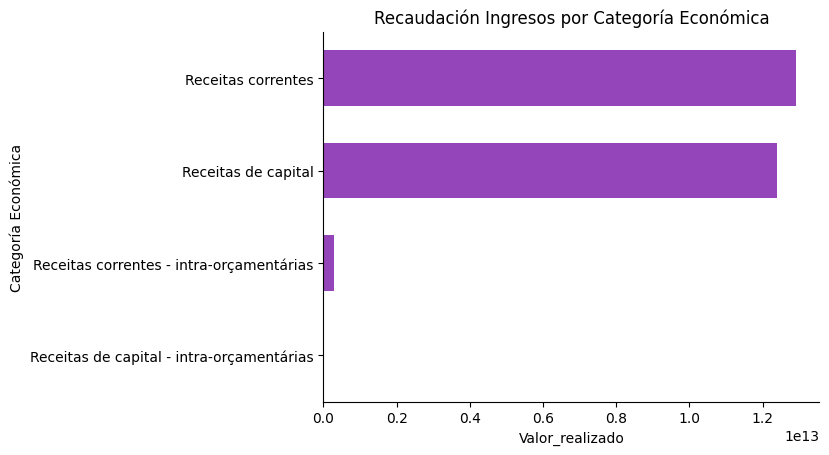

In [438]:
#genera la tercera visualizacion (recaudacion ingresos por categoria economica)
ax = sns.barplot(x="Valor_realizado", 
            y="Categoria_econômica",
            data=df_ingresos_categoria,
            color="darkorchid",
            width=0.6
            ) 

plt.title("Recaudación Ingresos por Categoría Económica")
plt.ylabel("Categoría Económica")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

En el análisis exploratorio, los Ingresos Corrientes parecía que se llevaban casi toda la recaudación, pues esta categoría aparecía en un 95,45% de los registros. Los ingresos de capital únicamente aparecían en el 2,93%. Sin embargo, a través de este gráfico lo que se puede observar y concluir es que aunque los Ingresos Corrientes sean la categoría económica de la que más veces se ha recaudado entre 2013 y 2021, en términos monetarios está bastante igualada a la de Ingresos de Capital. Es decir, de Ingresos Corrientes se recauda con mucha frecuencia pero en cantidades de dinero pequeñas y de Ingresos de Capital se recauda con mucha menor frecuencia pero en cantidades de dinero muy grandes. De Ingresos Corrientes se han recaudado 12,9 billones entre 2013 y 2021, lo que supone el 50,35% de la recaudación total en estos años y de Ingresos de Capital 12,4 billones, un 48,39% sobre la recaudación total. Estas dos categorías son las que claramente se llevan el monto de la recaudación. De Ingresos corrientes - intra-presupuestarios se recauda el 1,14% y por último, de Ingresos de capital - intra-presupuestarios el 0,11%, es decir, prácticamente nada

Ahora me interesa observar estas diferencias en la recaduación por categorías económicas (concretamente, por la de Ingresos Corrientes e Ingresos de Capital ya que he visto que entre estas dos se recauda prácticamente el 99% de los ingresos) por años también

In [439]:
#se queda con los registros cuya categoria economica es o ingresos corrientes o ingresos de capital
categorias = ["Receitas correntes", "Receitas de capital"]
df_categorias_principales = df[df["Categoria_econômica"].isin(categorias)]
df_categorias_principales.head()

,Nome_órgão_superior,Nome_órgão,Nome_unidade_gestora,Categoria_econômica,Origem_receita,Espécie_receita,Detalhamento,Valor_previsto_atualizado,Valor_lançado,Valor_realizado,Percentual_realizado,Data_lançamento,Ano_exercício,Mes_registro
0,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Bens, direitos e valores incorporados ao patr",Rec.divida ativa nao tributaria de outras rec,0.0,0.0,1297.13,0.0,2013-12-31,2013,12.0
1,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Indenizações, restituições e ressarcimentos",Recuperacao de despesas de exerc. anteriores,0.0,0.0,26666621.42,0.0,2013-12-31,2013,12.0
2,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Multas administrativas, contratuais e judicia",Outras multas e juros de mora,0.0,0.0,301251.13,0.0,2013-12-31,2013,12.0
3,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Bens, direitos e valores incorporados ao patr",Rec.div.ativa por infração administrativa,0.0,0.0,1855.58,0.0,2013-12-31,2013,12.0
4,Advocacia-geral da união,Advocacia-geral da união - unidades com víncul...,Coord. geral de orc. fin. e anal. cont. - agu,Receitas correntes,Outras receitas correntes,"Indenizações, restituições e ressarcimentos",Outras restituicoes,0.0,0.0,52140.68,0.0,2013-12-31,2013,12.0


In [440]:
#genera el dataframe para la cuarta visualizacion (recaudacion de ingresos por categoria economica y años)
df_ingresos_año_categoria = df_categorias_principales.groupby(["Ano_exercício", "Categoria_econômica"])["Valor_realizado"].sum()
df_ingresos_año_categoria = df_ingresos_año_categoria.reset_index()
df_ingresos_año_categoria

,Ano_exercício,Categoria_econômica,Valor_realizado
0,2013,Receitas correntes,1.224575e+12
1,2013,Receitas de capital,6.423447e+11
2,2014,Receitas correntes,1.247919e+12
3,2014,Receitas de capital,9.521063e+11
4,2015,Receitas correntes,1.285850e+12
5,2015,Receitas de capital,1.332216e+12
6,2016,Receitas correntes,1.362795e+12
7,2016,Receitas de capital,1.434742e+12
8,2017,Receitas correntes,1.397356e+12
9,2017,Receitas de capital,1.119288e+12


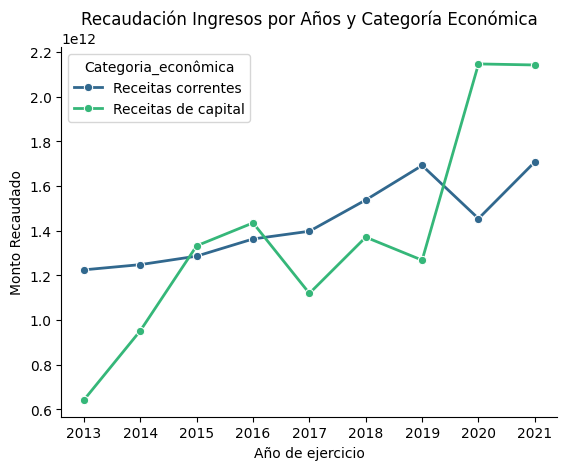

In [441]:
#genera la cuarta visualizacion (recaudacion de ingresos por categoria economica y años)
sns.lineplot(x = df_ingresos_año_categoria["Ano_exercício"],
              y = df_ingresos_año_categoria["Valor_realizado"], 
              hue = df_ingresos_año_categoria["Categoria_econômica"],
               marker = "o", 
                linewidth = 2, 
                palette="viridis", 
                errorbar = None)

plt.title("Recaudación Ingresos por Años y Categoría Económica")
plt.xlabel("Año de ejercicio")
plt.ylabel("Monto Recaudado")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

En este gráfico se puede observar como la recaudación de ingresos corrientes ha seguido una trayectoria bastante más lineal y estable que la de ingresos de capital. En el caso de los ingresos corrientes se observa que la recaudación proveniente de esta categoría económica sigue una ligera tendencia alcista aunque con un descenso bastante claro en el 2020 (pasando de recaudar 1,69 billones en 2019 a 1,45 billones en 2020). El mínimo está en 2013 con 1,22 billones y el máximo en 2021 con un 1,70 billones. En cuanto a la recaudación proveniente de los ingresos de capital, parece que esta ha seguido una trayectoria alcista de forma general con el paso de los años, pues se pasa de 0,64 billones en 2013 a 2,14 billones en 2021. Sin embargo, en relación a estos ingresos se observa una mayor fluctuación a lo largo de los años. De 2013 a 2016 la recaudación aumenta, luego cae en 2017, vuelve a recuperarse en 2018, y vuelve a caer en 2019. De 2019 a 2020 se ve el cambio más drástico, pues pasa de 1,26 billones a 2,14 billones. Es curioso pues 2020 parece que fue un mal año en la recaudación de ingresos corrientes y sin embargo el mejor año en la de ingresos de capital

De igual forma que he observado está comparación entre el % sobre la recaudación en términos de cantidad o monetarios para las categorías económicas, ahora voy a pasar a hacerlo para los órganos superiores

In [442]:
#genera el dataframe para la quinta visualizacion (recaudacion de ingresos por organos superiores)
df_ingresos_organos = df.groupby("Nome_órgão_superior")["Valor_realizado"].sum()
df_ingresos_organos = df_ingresos_organos.reset_index()
df_ingresos_organos["%/Total"] = round((df_ingresos_organos["Valor_realizado"] / total_ingresos)*100,2)
df_ingresos_organos

,Nome_órgão_superior,Valor_realizado,%/Total
0,Advocacia-geral da união,3.349630e+08,0.00
1,Controladoria-geral da união,7.555037e+06,0.00
2,"Ministério da agricultura, pecuária e abastec",5.643395e+10,0.22
3,Ministério da cidadania,5.143388e+09,0.02
4,"Ministério da ciência, tecnologia, inovações",3.479113e+10,0.14
5,Ministério da defesa,1.046657e+11,0.41
6,Ministério da economia,2.470975e+13,96.38
7,Ministério da educação,2.215894e+11,0.86
8,Ministério da infraestrutura,1.362069e+11,0.53
9,Ministério da justiça e segurança pública,2.521915e+10,0.10


Me voy a quedar únicamente con los 5 órganos superiores con mayor % sobre la recaudación total para la visualización 

In [443]:
#devuelve los 5 primeros organos con mayor recaudacion
df_ingresos_organos = df_ingresos_organos.nlargest(5, columns="%/Total")
df_ingresos_organos

,Nome_órgão_superior,Valor_realizado,%/Total
6,Ministério da economia,2.470975e+13,96.38
7,Ministério da educação,2.215894e+11,0.86
17,Ministério de minas e energia,1.914859e+11,0.75
8,Ministério da infraestrutura,1.362069e+11,0.53
5,Ministério da defesa,1.046657e+11,0.41


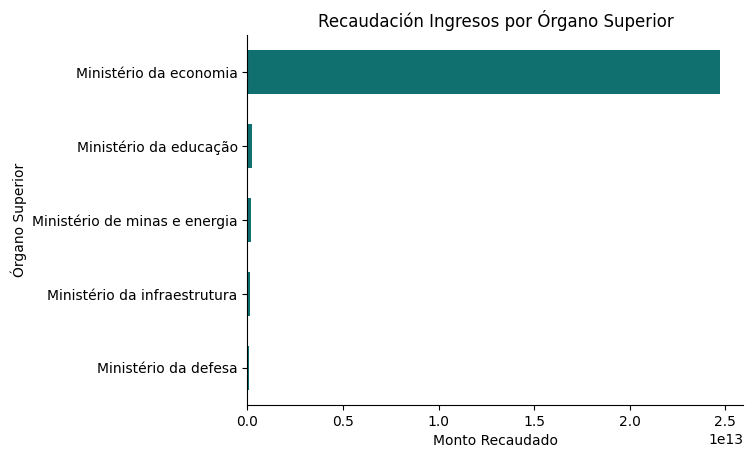

In [444]:
#genera la quinta visualizacion (recaudacion ingresos por organo superior)
sns.barplot(x="Valor_realizado", 
            y="Nome_órgão_superior",
            data=df_ingresos_organos,
            color="teal",
            width=0.6
            ) 

plt.title("Recaudación Ingresos por Órgano Superior")
plt.ylabel("Órgano Superior")
plt.xlabel("Monto Recaudado")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

En el análisis exploratorio, el Ministerio de Educación y el Ministerio de Economía eran los dos que más veces aparecían en los registros (con un 35,26% y 20,23% respectivamente). Es decir, entre los dos, aparecían en algo más del 55% de los registros y apuntaba a que serían por tanto los que más habrían recaudado entre 2013 y 2021. Sin embargo, los datos de la recaudación en términos monetarios reflejan que el Minesterio de Economía es el órgano superior que entre 2013 y 2021 se ha llevado el 96,38% de la recaudación con 24,7 billones. Es decir, este ministerio recauda los ingresos el 20,23% de las veces y es quien más dinero recauda con diferencia ósea que recauda en cantidades muy grandes cada vez que lo hace. Sin embargo, el ministerio de educación, que recauda algo más pues recauda el 35,26% de las veces, en términos monetarios recauda infinitamente menos ya que se lleva únicamente el 0,86% de la recaudación total en los 9 años de estudio, que son 0,22 billones. Es decir, este ministerio, recauda en cantidades de dinero mucho más pequeñas. Seguidos de estos dos tenemos el Ministerio de Minas y Energía, el Ministerio de Infraestructura y el Ministerio de Defensa, que han recaudado 0,19 billones (0,75% de la recaudación total), 0,13 billones (0,53% de la recaudación total) y 0,1 billones (0,41% de la recaudación total) respectivamente

Ahora, sabiendo que el Ministerio de Economía es quien se ha llevado en estos 9 años el 96% de la recaudación, voy a observar específicamente la trayectoria en la recaudación de este Ministerio que ha seguido con el paso de los años

In [445]:
#se queda con los registros cuyo organo superior es el ministerio de economia 
df_ministerio_economia = df[df["Nome_órgão_superior"] == "Ministério da economia"]
df_ministerio_economia.head()

,Nome_órgão_superior,Nome_órgão,Nome_unidade_gestora,Categoria_econômica,Origem_receita,Espécie_receita,Detalhamento,Valor_previsto_atualizado,Valor_lançado,Valor_realizado,Percentual_realizado,Data_lançamento,Ano_exercício,Mes_registro
590,Ministério da economia,Ministério da economia - unidades com vínculo ...,Secretaria da receita federal do brasil-rfb,Receitas correntes,"Impostos, taxas e contribuições de melhoria",Impostos,Retido nas fontes - trabalho,0.000000e+00,3.604863e+10,0.000000e+00,0.0,2013-12-31,2013,12.0
591,Ministério da economia,"Instituto nacional de metrologia, qualidade e ...",Instituto nac.de metrolog. qualid. e tecnolog,Receitas de capital,Alienação de bens,Alienação de bens móveis,Alienacao de veiculos,4.737640e+05,0.000000e+00,1.356250e+06,286.0,2013-12-31,2013,12.0
592,Ministério da economia,Ministério da economia - unidades com vínculo ...,Setorial orcamentaria e financeira / me,Receitas correntes,Outras receitas correntes,"Bens, direitos e valores incorporados ao patr",Rec.divida ativa cofins - principal,5.203976e+08,0.000000e+00,4.420626e+09,849.0,2013-12-31,2013,12.0
593,Ministério da economia,Ministério da economia - unidades com vínculo ...,Coordenacao-geral de orc. e financas/mp,Receitas correntes,Outras receitas correntes,"Multas administrativas, contratuais e judicia",Multas e juros de mora de laudemios,1.918718e+06,0.000000e+00,0.000000e+00,0.0,2013-12-31,2013,12.0
594,Ministério da economia,Ministério da economia - unidades com vínculo ...,Setorial orcamentaria e financeira / me,Receitas correntes,"Impostos, taxas e contribuições de melhoria",Impostos,Retido nas fontes - trabalho,6.302073e+10,0.000000e+00,6.747989e+10,107.0,2013-12-31,2013,12.0


In [446]:
#genera el dataframe para la sexta visualizacion (recaudacion de ingresos por ministerio de economia y años)
df_ingresos_año_ministerio = df_ministerio_economia.groupby("Ano_exercício")["Valor_realizado"].sum()
df_ingresos_año_ministerio = df_ingresos_año_ministerio.reset_index()
df_ingresos_año_ministerio

,Ano_exercício,Valor_realizado
0,2013,1.817203e+12
1,2014,2.157444e+12
2,2015,2.580696e+12
3,2016,2.735629e+12
4,2017,2.454951e+12
5,2018,2.853017e+12
6,2019,2.808484e+12
7,2020,3.531378e+12
8,2021,3.770951e+12


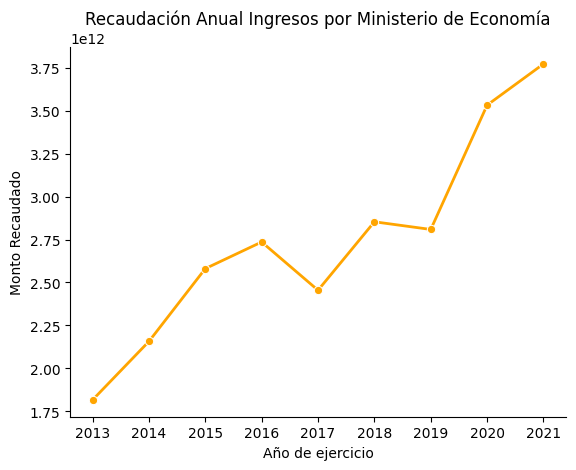

In [447]:
#genera la sexta visualizacion (recaudacion de ingresos por ministerio de economia y años)
sns.lineplot(x = df_ingresos_año_ministerio["Ano_exercício"],
              y = df_ingresos_año_ministerio["Valor_realizado"], 
               marker = "o", 
                linewidth = 2, 
                color="orange", 
                errorbar = None)

plt.title("Recaudación Anual Ingresos por Ministerio de Economía")
plt.xlabel("Año de ejercicio")
plt.ylabel("Monto Recaudado")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

La recaudación por parte del Ministerio de Economía ha fluctuado bastante de 2013 a 2021 siguiendo una tendencia alcista, aunque con decrecimientos en 2017 y 2019. En 2013 el Ministerio de Economía recaudó 1,81 billones finalizando en 2021 con una recaudación de 3,77 billones. Es decir, en estos 9 años ha logrado un aumento de casi 2 billones. En 2017 tuvo una caída en la recaudación, pasando de 2,73 billones en 2016 a 2,45 billones en 2017. Luego en 2018 recuperó de nuevo, pero en 2019 volvió a sufrir una caída aunque esta vez bastante menos notable. Pasó de 2,85 billones en 2018 a 2,80 billones en 2019. Por la tendencia alcista que ha seguido en estos 9 años, parece que si el Ministerio continúa con esta misma trayectoria, podría en unos años estar alcanzando aún cifras de recaudación bastante más elevadas

Lo que he observado a través de todos estos gráficos es que parece que la recaudación con el paso de los años muestra un crecimiento que sugiere un escenario bastante optimista de forma general

Análisis ingresos previstos vs ingresos recaudados

Me interesa conocer el total de ingresos previstos entre 2013 y 2021

In [448]:
#calcula el total de los ingresos previstos para todos los años
total_ingresos_previstos = df["Valor_previsto_atualizado"].sum()
total_ingresos_previstos

np.float64(28337573811868.727)

In [449]:
#calcula la diferencia entre los ingresos previstos y los recaudados finalmente 
total_ingresos_previstos - total_ingresos

np.float64(2700191376422.7227)

In [450]:
#calcula el percentual para todos los años 
(total_ingresos / total_ingresos_previstos)*100

np.float64(90.47133888614066)

La previsión en la recaudación del gobierno de Brasil entre 2013 y 2021 fue de 28.337.573.811.868 BRL. La recaudación real fue de 25.637.382.435.446 BRL. Es decir, en términos generales hubo una sobreestimación. Concretamente, una sobreestimación del 90,47%. Se preveía haber recaudado unos 270.019.137.642 BRL más

De igual forma que he observado esta diferencia para todos los años, ahora lo voy a observar año a año 

In [ ]:
#genera el dataframe para la septima visualizacion (percentual por años)
df_previsiones_año = df.groupby("Ano_exercício").agg({"Valor_realizado": "sum", "Valor_previsto_atualizado": "sum"})
df_previsiones_año = df_previsiones_año.reset_index()
df_previsiones_año["Percentual"] = round((df_previsiones_año["Valor_realizado"] / df_previsiones_año["Valor_previsto_atualizado"])*100,2)
df_previsiones_año

,Ano_exercício,Valor_realizado,Valor_previsto_atualizado,Percentual
0,2013,1.893614e+12,2.174651e+12,87.08
1,2014,2.238551e+12,2.392129e+12,93.58
2,2015,2.665685e+12,2.878828e+12,92.60
3,2016,2.839712e+12,2.952696e+12,96.17
4,2017,2.558047e+12,3.414380e+12,74.92
5,2018,2.942388e+12,3.505648e+12,83.93
6,2019,2.991565e+12,3.261379e+12,91.73
7,2020,3.631449e+12,3.577147e+12,101.52
8,2021,3.876372e+12,4.180716e+12,92.72


A través del percentual podemos concluir dos cosas. La primera, si ha habido subestimación o sobreestimación. En caso de sobreestimación el percentual será menor que el 100% pues la previsión > lo recaudado realmente. En caso de subestimación, el percentual será mayor al 100%, pues lo recaudado > la previsión. La segunda, el nivel de precisión en las estimaciones. Es decir, cuanto más se acerque el percentual al 100%, más precisa habrá sido la previsión

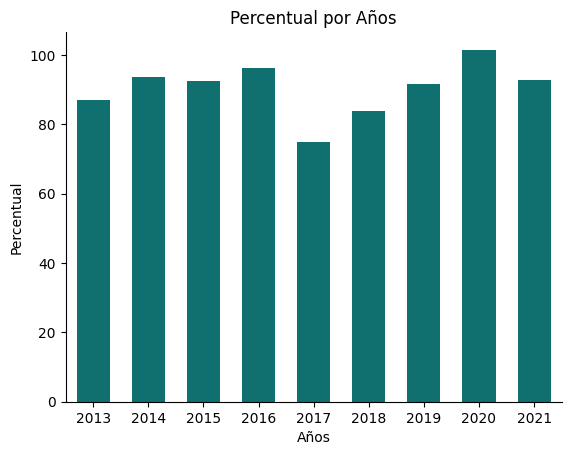

In [471]:
#genera la septima visualizacion (percentual por años)
sns.barplot(x="Ano_exercício", 
            y="Percentual",
            data=df_previsiones_año,
            color="teal",
            width=0.6
            ) 

plt.title("Percentual por Años")
plt.ylabel("Percentual")
plt.xlabel("Años")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

Ahora, este percentual puede interesar calcularlo por órgano superior o por categoría económica para todos los años

In [479]:
#genera el dataframe para la octava visualizacion (percentual por organo superior)
df_previsiones_organo = df.groupby("Nome_órgão_superior").agg({"Valor_realizado": "sum", "Valor_previsto_atualizado": "sum"})
df_previsiones_organo = df_previsiones_organo.reset_index()
df_previsiones_organo["Percentual"] = round((df_previsiones_organo["Valor_realizado"] / df_previsiones_organo["Valor_previsto_atualizado"])*100,2)
df_previsiones_organo = df_previsiones_organo.sort_values(by= "Percentual")
df_previsiones_organo

,Nome_órgão_superior,Valor_realizado,Valor_previsto_atualizado,Percentual
1,Controladoria-geral da união,7.555037e+06,7.406929e+08,1.02
0,Advocacia-geral da união,3.349630e+08,3.726054e+09,8.99
3,Ministério da cidadania,5.143388e+09,4.395888e+10,11.70
19,Ministério do desenvolvimento regional,1.935649e+10,1.259673e+11,15.37
10,"Ministério da mulher, família e direitos huma",2.116892e+08,8.433669e+08,25.10
24,Presidência da república,1.649184e+10,6.413081e+10,25.72
7,Ministério da educação,2.215894e+11,6.095859e+11,36.35
12,Ministério da previdência social,1.424078e+07,3.732740e+07,38.15
20,Ministério do esporte,5.389624e+07,1.209097e+08,44.58
5,Ministério da defesa,1.046657e+11,1.985228e+11,52.72


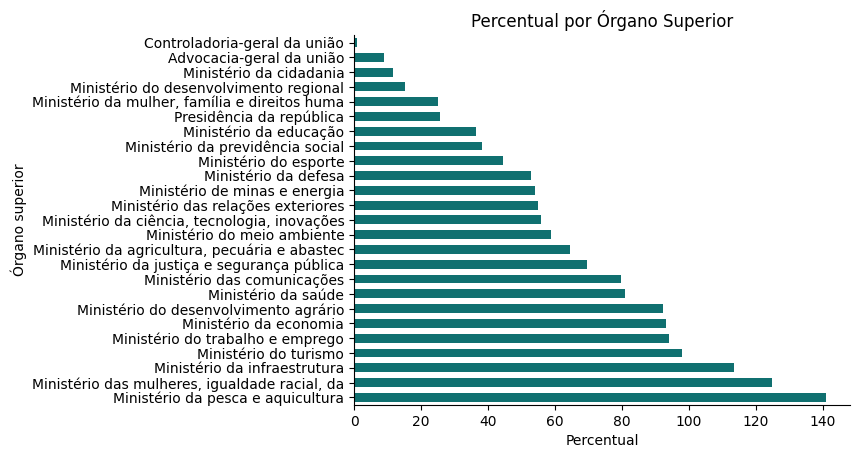

In [481]:
#genera la octava visualizacion (percentual por organo superior)
sns.barplot(x="Percentual", 
            y="Nome_órgão_superior",
            data=df_previsiones_organo,
            color="teal",
            width=0.6
            ) 

plt.title("Percentual por Órgano Superior")
plt.ylabel("Órgano superior")
plt.xlabel("Percentual")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

Me meto a analizar el area problematica detectada en cuanto a organos superiores- 

In [482]:
#genera el dataframe para la novena visualizacion (percentual por categoria economica)
df_previsiones_categoria = df.groupby("Categoria_econômica").agg({"Valor_realizado": "sum", "Valor_previsto_atualizado": "sum"})
df_previsiones_categoria = df_previsiones_categoria.reset_index()
df_previsiones_categoria["Percentual"] = round((df_previsiones_categoria["Valor_realizado"] / df_previsiones_categoria["Valor_previsto_atualizado"])*100,2)
df_previsiones_categoria = df_previsiones_categoria.sort_values(by= "Percentual")
df_previsiones_categoria

,Categoria_econômica,Valor_realizado,Valor_previsto_atualizado,Percentual
2,Receitas de capital,1.240714e+13,1.448575e+13,85.65
0,Receitas correntes,1.290934e+13,1.354953e+13,95.28
1,Receitas correntes - intra-orçamentárias,2.926518e+11,2.914850e+11,100.40
3,Receitas de capital - intra-orçamentárias,2.825084e+10,1.080841e+10,261.38
4,Sem informação,4.657000e+01,0.000000e+00,inf
